In [2]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Properties

In [3]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [4]:
Q = Atomic(var("x4") < 11/2500); Q

Atomic(x4 < 0.0044)

In [5]:
I = RIF(3, 3.5)

## Concurrency

In [6]:
import concurrent.futures as fut

pool = fut.ProcessPoolExecutor(4)

thread_pool = fut.ThreadPoolExecutor(1000)

def restart_pool():
    global pool
    
    del pool
    pool = fut.ProcessPoolExecutor(4)

In [7]:
def benchmark_prop(prop, duration, **kwargs):
    agg_metric = instrumentation.AggregateMetric()
    tim, sig = test_monitoring(prop, duration,
                               instrumentor=agg_metric, **kwargs)
    return sig, tim, agg_metric

def schedule_test(prop, duration, **kwargs):
    return {
        'prop': prop,
        'duration': duration,
        'kwargs': kwargs,
        'future': pool.submit(
            benchmark_prop, prop, duration, **kwargs),
    }

from gi.repository import Notify
Notify.init("LBUC Benchmarking")

def notify_when_done(ress, task_description=None):
    fut.wait(futures(ress))
    
    if task_description is None:
        Notify.Notification.new("Benchmark run done!").show()
    else:
        Notify.Notification.new("Benchmark run done!",
                                task_description).show()

def futures(results):
    return [res['future'] for res in results]

def gen_results(n, *args, task_description=None, **kwargs):
    results = [
        schedule_test(*args, **kwargs)
            for _ in range(n)
    ]
    thread_pool.submit(notify_when_done, results, task_description)
    return results

<ipython-input-7-b0324e55b331>:16: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Launch Runs

In [80]:
restart_pool()

In [9]:
num_runs = 5
duration = 1.5

In [62]:
warmup = gen_results(
    10,
    P | G(I, Q),
    duration,
    task_description='Warmup',
    use_masks=False,
    symbolic_composition=True,
) 

/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']


/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


ode in polynomial ring


/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


crude_roots = False
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.27

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 40.16 seconds
roots = [[2.6695060995470125 .. 3.0000000000000769], [3.6899999999994048 .. 3.6960000000001033]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769], 
 [3.6899999999994048 .. 3.6960000000001033]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769], 
 [3.6899999999994048 .. 3.6960000000001033]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 0.0004646778106689453
ran "restoring globals" 16 times in 0.0015380382537841797
ran "capturing globals [on exit]" 16 times in 0.0008685588836669922
ran "Running Flow*" 1 times in 52.91206240653992
ran "mask intersect check" 3336 times in 0.006909608840942383
ran "tentative eval" 3248 times in 3.331237554550171
ran "composing flowpipe" 877 times in 40.063963890075684
ran "whole domain eval" 875 times in

roots = [[2.6695060995470125 .. 3.0000000000000769]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 0.00045013427734375
ran "restoring globals" 16 times in 0.001516103744506836
ran "capturing globals [on exit]" 16 times in 0.000728607177734375
ran "Running Flow*" 1 times in 59.874396324157715
ran "mask intersect check" 3336 times in 0.006772041320800781
ran "tentative eval" 3248 times in 3.5086958408355713
ran "composing flowpipe" 875 times in 43.522162199020386
ran "whole domain eval" 875 times in 1.7482037544250488
ran "post retrieve" 660 times in 0.8822741508483887
ran "root detection" 660 times in 0.027456045150756836
ran "root amalgamation" 660 times in 0.00156402587890625
ran "prepare in check" 4 times in 3.552436828613281e-05
ra

ran "whole domain eval" 875 times in 1.6913294792175293
ran "post retrieve" 660 times in 0.8202731609344482
ran "root detection" 660 times in 0.026926755905151367
ran "root amalgamation" 660 times in 0.0014605522155761719
ran "prepare in check" 4 times in 3.2901763916015625e-05
ran "check boolean [unguarded]" 4 times in 0.001592397689819336
ran "observer.check" 4 times in 0.0018894672393798828
ran "Monitoring atomic x6 > 1" 1 times in 5.74052357673645
ran "Monitoring atomic x4 < 0.0044" 1 times in 42.495667457580566
ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 48.325088024139404
Run done in 99.10063576698303 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7efddca7fec0>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.07

ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 53.04906105995178
Run done in 105.90923023223877 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7efddcafdcc0>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.120000000

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 42.67 seconds
roots = [[2.6695060995470125 .. 3.0000000000000769]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.6695060995470125 .. 3.0000000000000769]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 4.6253204345703125e-05
ran "restoring globals" 16 times in 0.0016219615936

integrationScheme = 7
Computed 1668 flowpipes in 59.835876070006634 sec
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7efddca38740>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
Computed 1668 flowpipes in 49.87421632002224 sec
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7efddca37740>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, ve

ran "tentative eval" 3248 times in 3.281752347946167
ran "composing flowpipe" 875 times in 39.774998903274536
ran "whole domain eval" 875 times in 1.606477975845337
ran "post retrieve" 660 times in 0.7718479633331299
ran "root detection" 660 times in 0.02626347541809082
ran "root amalgamation" 660 times in 0.0013577938079833984
ran "prepare in check" 4 times in 3.790855407714844e-05
ran "check boolean [unguarded]" 4 times in 0.0015950202941894531
ran "observer.check" 4 times in 0.0019249916076660156
ran "Monitoring atomic x6 > 1" 1 times in 5.897619247436523
ran "Monitoring atomic x4 < 0.0044" 1 times in 39.708208322525024
ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 45.713135957717896
Run done in 105.72331428527832 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7efddcbb1a00>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.02000000000

fprime = -x2*x6 + 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 7.45 seconds
roots = []
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = []
seg_domain = [3.7109999999999723 .. 5.0020000000000007]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 4.863739013671875e-05
ran "restoring globals" 16 times in 0.0012955665588378906
ran "capturing globals [on exit]" 16 times in 0.0007517337799072266
ran "Running Flow*" 1 times in 50.84321904182434
ran "mask intersect check" 3336 times in 0.009308815002441406
ran "tentative eval" 933 times in 1.110436201095581
ran "composing flowpipe" 195 times in 10.517626523971558
ran "whole domain eval" 194 times in 0.40382909774780273
ran "post retrieve" 139 times in 0.17887544631958008
ran "root detection" 139 times in 0.005644559860229492
ran "root amalgamation" 139 t

C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 4.63 seconds
roots = [[0.73107619167936432 .. 0.94185785148114521]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
seg_domain = [0.0000000000000000 .. 1.5020000000000001]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.01 seconds
In G.signal
PolyObserver(-x4 + 0.0044000000000000003?, <flowstar.reachability.Reach object at 0x7efddca37820>, -x2*x6 + 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 8.5020000000000007], [[3.7310761916793642 .. 5.0020000000000007]]))
fprime = -x2*x6 + 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_d

symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 6.87 seconds
roots = [[0.73107619167936432 .. 0.94185785148114521]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 3.838539123535156e-05
ran "restoring globals" 16 times in 0.001440286636352539
ran "capturing globals [on exit]" 16 times in 0.0007207393646240234
ran "Running Flow*" 1 times in 57.40447783470154
ran "mask intersect check" 3336 times in 0.006586790084838867
ran "tentative eval" 2637 times in 2.6876564025878906
ran "composing flowpipe" 1486 times in 41.39489960670471
ran "whole domain eval" 1486 times in 2.8479106426239014
ran "post retrieve" 660 times

ran "Monitoring Signal for G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044) | x6 > 1" 1 times in 45.42475700378418
Run done in 103.20918893814087 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7efddcafd140>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.120000000

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 4.68 seconds
roots = [[0.73107619167936432 .. 0.94185785148114521]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
seg_domain = [0.0000000000000000 .. 1.5020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 7.128715515136719e-05
ran "restoring globals" 16 times in 0.0013499259948730469
ran "capturing globals [on exit]" 16 times in 0.0006916522979736328
ran "Running Flow*" 1 times in 52.05934810638428
ran "mask intersect check" 3336 times in 0.009958267211914062
ran "tentative eval" 1170 times in 1.2034637928009033
ran "composing flowpipe" 431 times in 23.588656663894653
ran "whole domain eval" 431 times in 0.8747076988220215
ran "post retrieve" 376 times in 0.4978902339935303
ran "root detection" 376 times in 0.016086339950561523
ran

ran "Monitoring atomic x6 > 1" 1 times in 5.933054447174072
ran "Monitoring Signal for G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044) & x6 > 1" 1 times in 26.749398946762085
Run done in 90.19609761238098 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7efdf412c580>, 'use_masks': True, 'symbolic_composition': True}
top-level root detection: 1 items in 4.80 seconds
roots = [[0.73107619167936432 .. 0.94185785148114521]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
seg_domain = [0.0000000000000000 .. 1.5020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 5.173683166503906e-05
ran "restoring globals" 16 times in 0.0014121532440185547
ran "capturing globals [on exit]" 16 times in 0.00070953369140625
ran "Running Flow*" 1 times in 52.604578256607056
ran "mask intersect check" 33

In [63]:
results_unmasked = gen_results(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Unmasked P | G(Q)',
    use_masks=False,
    symbolic_composition=True,
)

In [64]:
results_masked = gen_results(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Masked P | G(Q)',
    use_masks=True,
    symbolic_composition=True,
)

In [65]:
results_unmasked_reversed = gen_results(
    num_runs,
    G(I, Q) | P,
    duration,
    task_description='Unmasked G(Q) | P',
    use_masks=False,
    symbolic_composition=True,
)

In [66]:
results_masked_reversed = gen_results(
    num_runs,
    G(I, Q) & P,
    duration,
    task_description='Masked F(Q) & P',
    use_masks=True,
    symbolic_composition=True,
)

In [15]:
results_unmasked[0]['future'].result()[0]

Signal([0.0000000000000000 .. 1.5000000000000000], [([0.0000000000000000 .. 1.5000000000000000], True)], mask=None)

# Analysis

In [67]:
import pandas as pd

In [68]:
def total_time_for_key(inst, ks):
    if isinstance(ks, str):
        ks = [ks]

    return sum(inst.total_time(k)
               for k in ks)


def total_times(results, keys, keys_short=None):
    ress = [
        f.result() for f in futures(results)
    ]
    if keys_short is None:
        keys_short = keys
    data = pd.DataFrame({
        short_key: [total_time_for_key(r[2], key) for r in ress]
        for short_key, key in zip(keys_short, keys)
    })
    data.insert(len(keys), 'Total',
                [r[1] for r in ress])
    return data

In [69]:
results_unmasked[0]['future'].result()[2].events

['Precomposing Contexts',
 'restoring globals',
 'capturing globals [on exit]',
 'Running Flow*',
 'mask intersect check',
 'tentative eval',
 'composing flowpipe',
 'whole domain eval',
 'post retrieve',
 'root detection',
 'root amalgamation',
 'prepare in check',
 'check boolean [unguarded]',
 'observer.check',
 'Monitoring atomic x6 > 1',
 'Monitoring atomic x4 < 0.0044',
 'Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)']

In [70]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P | G(I, Q)}',
        f'Monitoring Signal for {G(I, Q) | P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P | G(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results

In [71]:
times_unmasked = total_times(
    results_unmasked,
    cols_full,
    cols_short,
)
times_unmasked

,Flow*,P,Q,P | G(Q),tentative eval,root detection,composing flowpipe,Total
0,51.599025,6.395787,39.829344,46.322496,3.242143,0.026164,40.385964,98.090237
1,60.315117,6.617105,39.457317,46.157910,3.211459,0.026503,40.218330,106.642945
2,59.835863,5.897619,39.708208,45.713136,3.281752,0.026263,39.774999,105.723314
3,50.751895,6.474179,43.988088,50.553225,3.841515,0.027000,43.804419,101.462306
4,49.874196,6.022131,39.197219,45.309449,3.196713,0.026056,39.472448,95.328560


In [72]:
times_unmasked['Flow*'].std()

5.151358107997558

In [73]:
times_masked = total_times(
    results_masked,
    cols_full,
    cols_short,
)
times_masked

,Flow*,P,Q,P | G(Q),tentative eval,root detection,composing flowpipe,Total
0,50.194442,4.529647,5.707812,10.328794,0.872809,0.005202,8.783137,60.679837
1,50.843219,4.840234,7.473095,12.406711,1.110436,0.005645,10.517627,63.411967
2,54.523299,4.719995,6.152996,10.951844,0.937863,0.005363,9.321006,65.634893
3,50.491640,4.593885,5.831132,10.506449,0.897418,0.005248,8.936787,61.139756
4,52.438623,4.646413,6.122736,10.868738,0.934771,0.005433,9.206989,63.483314


In [74]:
times_masked['Flow*'].std()

1.8012132041443214

## Comparison

In [75]:
series = ['masked', 'unmasked',
          'masked_reversed', 'unmasked_reversed']
# total_timess = {
#    s: pd.load_csv(f'data/analysis3_raw_{s}.csv')
#    for s in series 
# }
total_timess = {
    s: total_times(eval(f'results_{s}'), cols_full, cols_short)
    for s in series 
}

In [79]:
for s, d in total_timess.items():
    d.to_csv(f'data/analysis3_raw_{s}.csv')

In [76]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})

In [81]:
comparison

,masked,unmasked,masked_reversed,unmasked_reversed
Flow*,51.698245,54.475219,52.862549,55.707290
P,4.666035,6.281364,4.983861,6.595809
Q,6.257554,40.436035,20.109990,42.201623
P | G(Q),11.012507,46.811243,0.000000,48.893257
tentative eval,0.950660,3.354716,1.158478,2.663521
root detection,0.005378,0.026397,0.015140,0.027092
composing flowpipe,9.353109,40.731232,22.068476,42.259191
Total,62.869954,101.449472,78.876031,104.754707


In [82]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.666035,6.257554
unmasked,6.281364,40.436035
masked_reversed,4.983861,20.109990
unmasked_reversed,6.595809,42.201623


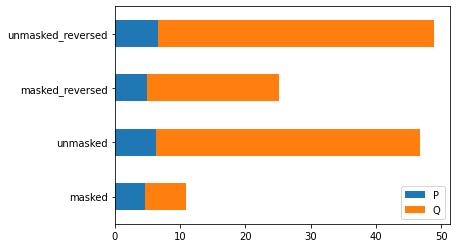

In [83]:
comparison2.plot(kind='barh', stacked=True)

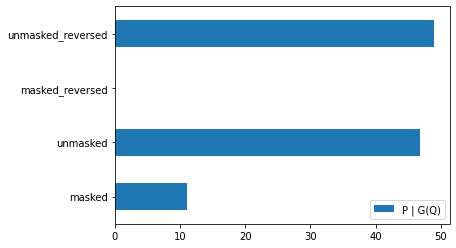

In [84]:
comparison3 = comparison.loc[['P | G(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [85]:
restart_pool()